<a href="https://colab.research.google.com/github/TANYA-CHAN/NLP_SummerProject_Drafts/blob/main/LR_for_song_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim

In [ ]:
import nltk
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

In [ ]:
RANDOM_SEED = 123
DEVICE = "cuda"
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/lyrics1.csv", delimiter = ",", dtype = {'lyrics':str})

In [ ]:
 
df['ranker_genre'] = np.where((df['ranker_genre'] == 'screamo')|(df['ranker_genre'] == 'punk rock')|(df['ranker_genre'] == 'heavy metal'),'alt rock',df['ranker_genre'])
df['ranker_genre'] = np.where((df['ranker_genre']== 'rhythm and blues'),'pop',df['ranker_genre'])
group = ['song', 'year', 'album', 'genre', 'artist', 'ranker_genre']
lyrics_by_song = df.sort_values(group).groupby(group).lyric.apply(' '.join).apply(lambda x: x.lower()).reset_index(name='lyric')
lyrics_by_song["lyric"] = lyrics_by_song['lyric'].str.replace(r'[^\w\s]','')

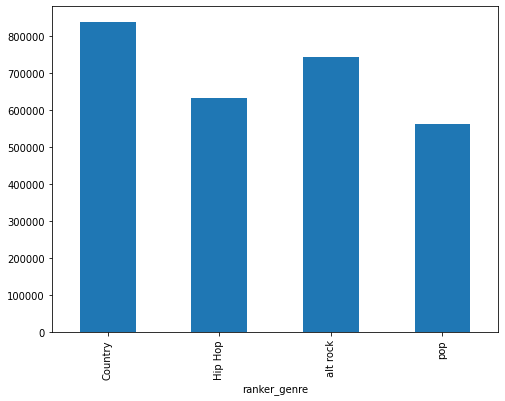

In [ ]:
fig = plt.figure(figsize=(8,6))
df.groupby('ranker_genre').lyric.count().plot.bar(ylim=0)
plt.show()

In [ ]:
len(df)

2778359

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;|\n]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
lyrics = df["lyric"]

In [ ]:
def clean_text(text):
    text = BeautifulSoup(text, "lxml").text 
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text

In [ ]:
lyrics = lyrics.apply(clean_text)
df["lyric"]=lyrics

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [ ]:
X = df.lyric
y = df.ranker_genre
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, multi_class = "multinomial", 
                                           C=100000, solver = "sag", class_weight="balanced")),
               ])

In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000, class_weight='balanced',
                                    dual=False, fit_intercept=True,
               

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
my_tags = ["country","hip hop","alt rock","pop"]

In [ ]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.5742704329172605
              precision    recall  f1-score   support

     country       0.62      0.58      0.60    251531
     hip hop       0.74      0.67      0.70    189490
    alt rock       0.56      0.51      0.53    223463
         pop       0.41      0.54      0.47    169024

    accuracy                           0.57    833508
   macro avg       0.58      0.58      0.58    833508
weighted avg       0.59      0.57      0.58    833508

